For some reason there's always a spike in the loss at what seems to be a fixed interval -- makes me think it's the same batch

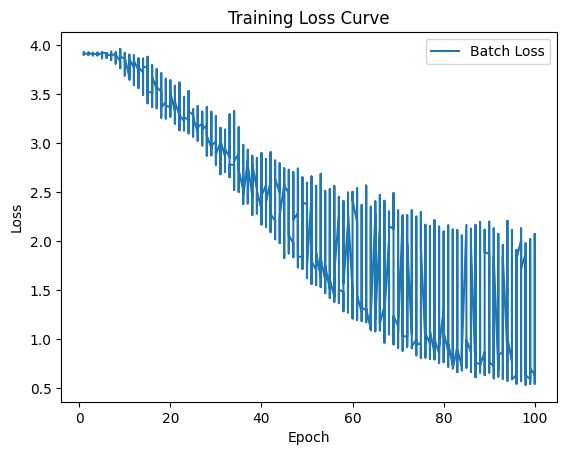

In [11]:
import json
import matplotlib.pyplot as plt

# Path to your training_statistics.json file
stats_path = 'runs/data/roshnipm_pair_wd0.0001_dr0.1_rTEMP/training_statistics.json'

with open(stats_path, 'r') as f:
    stats = json.load(f)

# Extract loss per batch or per epoch
batch_losses = [entry['batch_loss'] for entry in stats if 'batch_loss' in entry]
epochs = [entry['epoch'] for entry in stats if 'batch_loss' in entry]

plt.plot(epochs, batch_losses, label='Batch Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()

In [13]:
len(epochs)

9100

ValueError: x and y must have same first dimension, but have shapes (1,) and (9100,)

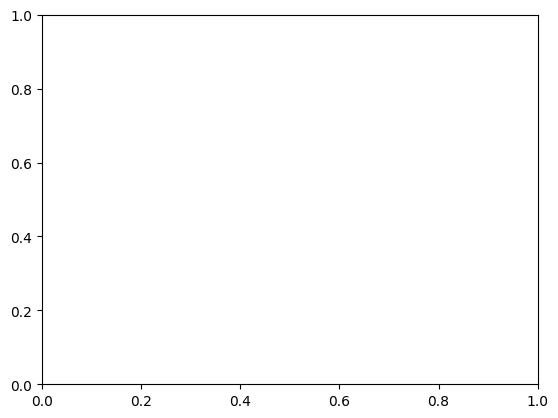

In [12]:
# extract loss per epoch
batches_by_epoch = []
epochs_by_batch = []
for i in range(100):
    batches_by_epoch.append(np.mean(batch_losses[91*i:91*i+100]))
    epochs_by_batch.append(np.mean(batch_losses[100*i:100*i+91]))

import numpy as np
plt.plot(set(epochs), [batch_losses], label='Batch Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()